In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare, kstest, normaltest

In [225]:
column_names = ["Time_of_Birth", "Sex", "Birth_Weight", "Minutes_After_Midnight"]
column_widths = [8, 8, 8, 8]
df = pd.read_fwf("source/babyboom.dat.txt", widths=column_widths, names=column_names)
df

,Time_of_Birth,Sex,Birth_Weight,Minutes_After_Midnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [226]:
# num_bins = int(1 + np.floor(np.log2(df.shape[0])))
num_bins = 15
num_bins

15

Проверка веса мланденцев

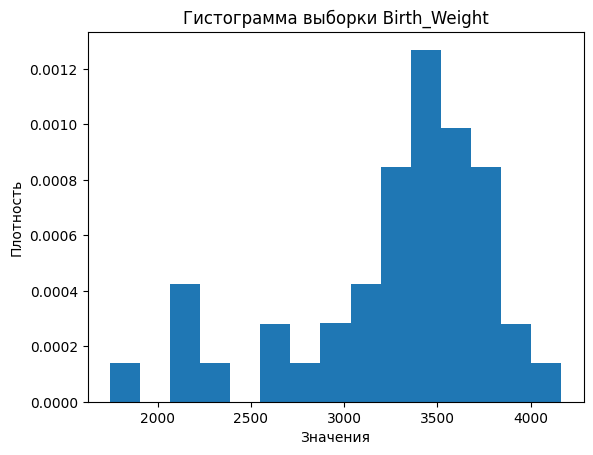

In [227]:
plt.hist(df['Birth_Weight'], bins=num_bins, density=True)
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.title('Гистограмма выборки Birth_Weight')
plt.show()

In [228]:
histogram_weight, bin_edges_weight = np.histogram(df['Birth_Weight'], bins=num_bins)
observed_freq_weight = histogram_weight
observed_freq_weight, bin_edges_weight

(array([1, 0, 3, 1, 0, 2, 1, 2, 3, 6, 9, 7, 6, 2, 1], dtype=int64),
 array([1745.        , 1906.13333333, 2067.26666667, 2228.4       ,
        2389.53333333, 2550.66666667, 2711.8       , 2872.93333333,
        3034.06666667, 3195.2       , 3356.33333333, 3517.46666667,
        3678.6       , 3839.73333333, 4000.86666667, 4162.        ]))

In [229]:
# Создаем новые интервалы
new_bin_edges = [-np.inf]  # Начинаем с первой границы
new_observed_freq = []  # Создаем новый список для наблюдаемых частот
current_bin_freq = 0  # Счетчик значений в текущем интервале

for i in range(1, len(bin_edges_weight)):
    current_bin_freq += observed_freq_weight[i - 1]
    if current_bin_freq >= 5:
        new_bin_edges.append(bin_edges_weight[i])
        new_observed_freq.append(current_bin_freq)
        current_bin_freq = 0

# Последний интервал (если он остался) добавляем в последний интервал
if current_bin_freq > 0:
    new_observed_freq[-1] += current_bin_freq

# Преобразуем списки в массивы numpy
new_observed_freq = np.array(new_observed_freq)
new_bin_edges = np.array(new_bin_edges)
new_bin_edges[-1] = np.inf

observed_freq_weight = new_observed_freq / df.shape[0]
bin_edges_weight = new_bin_edges
observed_freq_weight, bin_edges_weight, sum(observed_freq_weight)

(array([0.11363636, 0.11363636, 0.20454545, 0.20454545, 0.15909091,
        0.20454545]),
 array([         -inf, 2389.53333333, 3034.06666667, 3356.33333333,
        3517.46666667, 3678.6       ,           inf]),
 1.0)

In [230]:
mean_weight = df['Birth_Weight'].mean()
std_dev_weight = df['Birth_Weight'].std()
dev_weight = df['Birth_Weight'].var()
print('Среднее: ', mean_weight)
print('Стандартное отклонение: ', std_dev_weight)
print('Дисперсия: ', dev_weight)

Среднее:  3275.9545454545455
Стандартное отклонение:  528.0324582405921
Дисперсия:  278818.27695560263


In [231]:
gamma = 0.95

In [277]:
n = df.shape[0]
a_est_left_weight = mean_weight - stats.t.ppf(1 - gamma / 2, n - 1) * std_dev_weight / np.sqrt(n-1)
a_est_right_weight = mean_weight + stats.t.ppf(1 - gamma / 2, n - 1) * std_dev_weight / np.sqrt(n-1)
print('Доверительный интервал для среднего: (', a_est_left_weight, '; ', a_est_right_weight, ')')

Доверительный интервал для среднего: ( 3270.875575506987 ;  3281.033515402104 )


In [233]:
chi_1_weight = stats.chi2.ppf(q=1 - gamma / 2, df=n - 1)
chi_2_weight = stats.chi2.ppf(q=gamma / 2, df=n - 1)
d_est_left_weight = n * dev_weight / chi_1_weight
d_est_right_weight = n * dev_weight / chi_2_weight
print('Доверительный интервал для дисперсии: (', d_est_left_weight, '; ', d_est_right_weight, ')')

Доверительный интервал для дисперсии: ( 285873.7119463273 ;  293762.9903000913 )


In [234]:
expected_freq_weight = []

for i in range(len(bin_edges_weight) - 1):
    lower_bound = bin_edges_weight[i]
    upper_bound = bin_edges_weight[i + 1]
    expected_count = stats.norm.cdf(upper_bound, loc=mean_weight, scale=std_dev_weight) - stats.norm.cdf(lower_bound, loc=mean_weight, scale=std_dev_weight)
    expected_freq_weight.append(expected_count)

expected_freq_weight, sum(expected_freq_weight)

([0.04660283975417198,
  0.27684003815697655,
  0.23705167201396915,
  0.11580691391746112,
  0.10082941147156399,
  0.22286912468585718],
 1.0)

In [235]:
chi_squared_statistic_weight, chi_squared_p_value_weight = stats.chisquare(f_obs=observed_freq_weight, f_exp=expected_freq_weight, ddof=2)
alpha = 0.05
if chi_squared_p_value_weight < alpha:
    print("Выборка не имеет нормальное распределение (p-value =", chi_squared_p_value_weight, ")")
else:
    print("Выборка имеет нормальное распределение (p-value =", chi_squared_p_value_weight, ")")

Выборка имеет нормальное распределение (p-value = 0.9599797134773039 )


In [236]:
ks_statistic_weight, ks_p_value_weight = stats.kstest(df['Birth_Weight'], 'norm', args=(mean_weight, std_dev_weight))
alpha = 0.05
if ks_p_value_weight < alpha:
    print("Выборка не имеет нормальное распределение (p-value =", ks_p_value_weight, ")")
else:
    print("Выборка имеет нормальное распределение (p-value =", ks_p_value_weight, ")")

Выборка имеет нормальное распределение (p-value = 0.09106523162555868 )


In [237]:
omega2_statistic_weight, omega2_p_value_weight = stats.shapiro(df['Birth_Weight'])
alpha = 0.05
if omega2_p_value_weight < alpha:
    print("Выборка не имеет нормальное распределение (p-value =", omega2_p_value_weight, ")")
else:
    print("Выборка имеет нормальное распределение (p-value =", omega2_p_value_weight, ")")

Выборка не имеет нормальное распределение (p-value = 0.0009944075718522072 )


Проверка веса мальчиков

In [238]:
boys_weight = df[df['Sex'] == 2]['Birth_Weight']
boys_weight

2     3554
3     3838
4     3625
7     2846
8     3166
9     3520
10    3380
11    3294
14    3521
17    2902
18    2635
19    3920
20    3690
25    3783
26    3345
27    3034
29    3300
31    3428
32    4162
33    3630
34    3406
35    3402
37    3736
38    3370
39    2121
40    3150
Name: Birth_Weight, dtype: int64

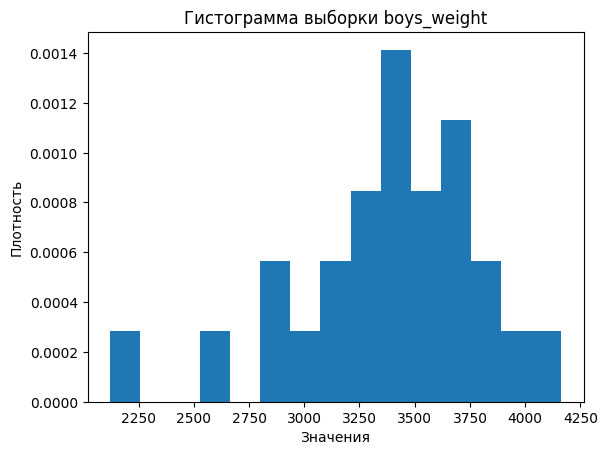

In [239]:
plt.hist(boys_weight, bins=num_bins, density=True)
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.title('Гистограмма выборки boys_weight')
plt.show()

In [240]:
histogram_boys, bin_edges_boys = np.histogram(boys_weight, bins=num_bins)
observed_freq_boys = histogram_boys
observed_freq_boys, bin_edges_boys

(array([1, 0, 0, 1, 0, 2, 1, 2, 3, 5, 3, 4, 2, 1, 1], dtype=int64),
 array([2121.        , 2257.06666667, 2393.13333333, 2529.2       ,
        2665.26666667, 2801.33333333, 2937.4       , 3073.46666667,
        3209.53333333, 3345.6       , 3481.66666667, 3617.73333333,
        3753.8       , 3889.86666667, 4025.93333333, 4162.        ]))

In [241]:
# Создаем новые интервалы
new_bin_edges_boys = [-np.inf]  # Начинаем с первой границы
new_observed_freq_boys = []  # Создаем новый список для наблюдаемых частот
current_bin_freq_boys = 0  # Счетчик значений в текущем интервале

for i in range(1, len(bin_edges_boys)):
    current_bin_freq_boys += observed_freq_boys[i - 1]
    if current_bin_freq_boys >= 5:
        new_bin_edges_boys.append(bin_edges_boys[i])
        new_observed_freq_boys.append(current_bin_freq_boys)
        current_bin_freq_boys = 0

# Последний интервал (если он остался) добавляем в последний интервал
if current_bin_freq_boys > 0:
    new_observed_freq_boys[-1] += current_bin_freq_boys

# Преобразуем списки в массивы numpy
new_observed_freq_boys = np.array(new_observed_freq_boys)
new_bin_edges_boys = np.array(new_bin_edges_boys)
new_bin_edges_boys[-1] = np.inf

observed_freq_boys = new_observed_freq_boys / len(boys_weight)
bin_edges_boys = new_bin_edges_boys
observed_freq_boys, bin_edges_boys, sum(observed_freq_boys)

(array([0.19230769, 0.19230769, 0.19230769, 0.42307692]),
 array([         -inf, 3073.46666667, 3345.6       , 3481.66666667,
                  inf]),
 1.0)

In [242]:
mean_boys = boys_weight.mean()
std_dev_boys = boys_weight.std()
dev_boys = boys_weight.var()
print('Среднее: ', mean_boys)
print('Стандартное отклонение: ', std_dev_boys)
print('Дисперсия: ', dev_boys)

Среднее:  3375.3076923076924
Стандартное отклонение:  428.0460507217203
Дисперсия:  183223.42153846152


In [278]:
n_boys = len(boys_weight)
a_est_left_boys = mean_boys - stats.t.ppf(1 - gamma / 2, n_boys - 1) * std_dev_boys / np.sqrt(n_boys-1)
a_est_right_boys = mean_boys + stats.t.ppf(1 - gamma / 2, n_boys - 1) * std_dev_boys / np.sqrt(n_boys-1)
print('Доверительный интервал для среднего: (', a_est_left_boys, '; ', a_est_right_boys, ')')

Доверительный интервал для среднего: ( 3369.8852601375056 ;  3380.730124477879 )


In [279]:
chi_1_boys = stats.chi2.ppf(q=1 - gamma / 2, df=n_boys - 1)
chi_2_boys = stats.chi2.ppf(q=gamma / 2, df=n_boys - 1)
d_est_left_boys = n_boys * dev_boys / chi_1_boys
d_est_right_boys = n_boys * dev_boys / chi_2_boys
print('Доверительный интервал для дисперсии: (', d_est_left_boys, '; ', d_est_right_boys, ')')

Доверительный интервал для дисперсии: ( 192277.61348058018 ;  199299.84269056882 )


In [245]:
expected_freq_boys = []

for i in range(len(bin_edges_boys) - 1):
    lower_bound = bin_edges_boys[i]
    upper_bound = bin_edges_boys[i + 1]
    expected_count = stats.norm.cdf(upper_bound, loc=mean_boys, scale=std_dev_boys) - stats.norm.cdf(lower_bound, loc=mean_boys, scale=std_dev_boys)
    expected_freq_boys.append(expected_count)

expected_freq_boys, sum(expected_freq_boys)

([0.2403552827324576,
  0.23197912639090051,
  0.12578234505801744,
  0.40188324581862445],
 1.0)

In [246]:
chi_squared_statistic_boys, chi_squared_p_value_boys = stats.chisquare(f_obs=observed_freq_boys, f_exp=expected_freq_boys, ddof=2)
alpha = 0.05
if chi_squared_p_value_boys < alpha:
    print("Выборка не имеет нормальное распределение (p-value =", chi_squared_p_value_boys, ")")
else:
    print("Выборка имеет нормальное распределение (p-value =", chi_squared_p_value_boys, ")")

Выборка имеет нормальное распределение (p-value = 0.8184442008608317 )


In [247]:
ks_statistic_boys, ks_p_value_boys = stats.kstest(boys_weight, 'norm', args=(mean_boys, std_dev_boys))
alpha = 0.05
if ks_p_value_boys < alpha:
    print("Выборка не имеет нормальное распределение (p-value =", ks_p_value_boys, ")")
else:
    print("Выборка имеет нормальное распределение (p-value =", ks_p_value_boys, ")")

Выборка имеет нормальное распределение (p-value = 0.5070763720555325 )


In [248]:
omega2_statistic_boys, omega2_p_value_boys = stats.normaltest(boys_weight)
alpha = 0.05
if omega2_p_value_boys < alpha:
    print("Выборка не имеет нормальное распределение (p-value =", omega2_p_value_boys, ")")
else:
    print("Выборка имеет нормальное распределение (p-value =", omega2_p_value_boys, ")")

Выборка не имеет нормальное распределение (p-value = 0.02287917589120297 )


Проверка веса девочек

In [249]:
girls_weight = df[df['Sex'] == 1]['Birth_Weight']
girls_weight

0     3837
1     3334
5     2208
6     1745
12    2576
13    3208
15    3746
16    3523
21    3430
22    3480
23    3116
24    3428
28    2184
30    2383
36    3500
41    3866
42    3542
43    3278
Name: Birth_Weight, dtype: int64

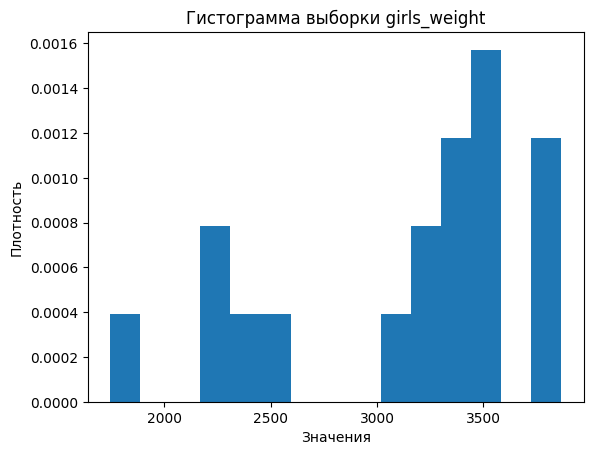

In [250]:
plt.hist(girls_weight, bins=num_bins, density=True)
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.title('Гистограмма выборки girls_weight')
plt.show()

In [251]:
histogram_girls, bin_edges_girls = np.histogram(girls_weight, bins=num_bins)
observed_freq_girls = histogram_girls
observed_freq_girls, bin_edges_girls

(array([1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 3, 4, 0, 3], dtype=int64),
 array([1745. , 1886.4, 2027.8, 2169.2, 2310.6, 2452. , 2593.4, 2734.8,
        2876.2, 3017.6, 3159. , 3300.4, 3441.8, 3583.2, 3724.6, 3866. ]))

In [252]:
# Создаем новые интервалы
new_bin_edges_girls = [-np.inf]  # Начинаем с первой границы
new_observed_freq_girls = []  # Создаем новый список для наблюдаемых частот
current_bin_freq_girls = 0  # Счетчик значений в текущем интервале

for i in range(1, len(bin_edges_girls)):
    current_bin_freq_girls += observed_freq_girls[i - 1]
    if current_bin_freq_girls >= 3:
        new_bin_edges_girls.append(bin_edges_girls[i])
        new_observed_freq_girls.append(current_bin_freq_girls)
        current_bin_freq_girls = 0

# Последний интервал (если он остался) добавляем в последний интервал
if current_bin_freq_girls > 0:
    new_observed_freq_girls[-1] += current_bin_freq_girls

# Преобразуем списки в массивы numpy
new_observed_freq_girls = np.array(new_observed_freq_girls)
new_bin_edges_girls = np.array(new_bin_edges_girls)
new_bin_edges_girls[-1] = np.inf

observed_freq_girls = new_observed_freq_girls / len(girls_weight)
bin_edges_girls = new_bin_edges_girls
observed_freq_girls, bin_edges_girls, sum(observed_freq_girls)

(array([0.16666667, 0.16666667, 0.27777778, 0.22222222, 0.16666667]),
 array([  -inf, 2310.6, 3159. , 3441.8, 3583.2,    inf]),
 1.0)

In [253]:
mean_girls = girls_weight.mean()
std_dev_girls = girls_weight.std()
dev_girls = girls_weight.var()
print('Среднее: ', mean_girls)
print('Стандартное отклонение: ', std_dev_girls)
print('Дисперсия: ', dev_girls)

Среднее:  3132.4444444444443
Стандартное отклонение:  631.582533586883
Дисперсия:  398896.49673202616


In [281]:
n_girls = len(girls_weight)
a_est_left_girls = mean_girls - stats.t.ppf(1 - gamma / 2, n_girls - 1) * std_dev_girls / np.sqrt(n_girls-1)
a_est_right_girls = mean_girls + stats.t.ppf(1 - gamma / 2, n_girls - 1) * std_dev_girls / np.sqrt(n_girls-1)
print('Доверительный интервал для среднего: (', a_est_left_girls, '; ', a_est_right_girls, ')')

Доверительный интервал для среднего: ( 3122.6961444757626 ;  3142.192744413126 )


In [282]:
chi_1_girls = stats.chi2.ppf(q=1 - gamma / 2, df=n_girls - 1)
chi_2_girls = stats.chi2.ppf(q=gamma / 2, df=n_girls - 1)
d_est_left_girls = n_girls * dev_girls / chi_1_girls
d_est_right_girls = n_girls * dev_girls / chi_2_girls
print('Доверительный интервал для дисперсии: (', d_est_left_girls, '; ', d_est_right_girls, ')')

Доверительный интервал для дисперсии: ( 429999.27766096813 ;  449219.8621942322 )


In [256]:
expected_freq_girls = []

for i in range(len(bin_edges_girls) - 1):
    lower_bound = bin_edges_girls[i]
    upper_bound = bin_edges_girls[i + 1]
    expected_count = stats.norm.cdf(upper_bound, loc=mean_girls, scale=std_dev_girls) - stats.norm.cdf(lower_bound, loc=mean_girls, scale=std_dev_girls)
    expected_freq_girls.append(expected_count)

expected_freq_girls, sum(expected_freq_girls)

([0.09658707832323682,
  0.420181930705297,
  0.1710968783800476,
  0.0744253608209855,
  0.23770875177043305],
 1.0)

In [257]:
chi_squared_statistic_girls, chi_squared_p_value_girls = stats.chisquare(f_obs=observed_freq_girls, f_exp=expected_freq_girls, ddof=2)
alpha = 0.05
if chi_squared_p_value_girls < alpha:
    print("Выборка не имеет нормальное распределение (p-value =", chi_squared_p_value_girls, ")")
else:
    print("Выборка имеет нормальное распределение (p-value =", chi_squared_p_value_girls, ")")

Выборка имеет нормальное распределение (p-value = 0.7463751453322932 )


In [258]:
ks_statistic_girls, ks_p_value_girls = stats.kstest(girls_weight, 'norm', args=(mean_girls, std_dev_girls))
alpha = 0.05
if ks_p_value_girls < alpha:
    print("Выборка не имеет нормальное распределение (p-value =", ks_p_value_girls, ")")
else:
    print("Выборка имеет нормальное распределение (p-value =", ks_p_value_girls, ")")

Выборка имеет нормальное распределение (p-value = 0.3315835424835907 )


In [259]:
omega2_statistic_girls, omega2_p_value_girls = stats.normaltest(girls_weight)
alpha = 0.05
if omega2_p_value_girls < alpha:
    print("Выборка не имеет нормальное распределение (p-value =", omega2_p_value_girls, ")")
else:
    print("Выборка имеет нормальное распределение (p-value =", omega2_p_value_girls, ")")

Выборка имеет нормальное распределение (p-value = 0.2036809963294718 )


C:\Users\draco\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [260]:
df['Time_Between_Births'] = df['Minutes_After_Midnight'].diff()
df['Time_Between_Births'] = df['Time_Between_Births'].fillna(0)
df['Hour_of_Day'] = df['Minutes_After_Midnight'] // 60
df

,Time_of_Birth,Sex,Birth_Weight,Minutes_After_Midnight,Time_Between_Births,Hour_of_Day
0,5,1,3837,5,0.0,0
1,104,1,3334,64,59.0,1
2,118,2,3554,78,14.0,1
3,155,2,3838,115,37.0,1
4,257,2,3625,177,62.0,2
5,405,1,2208,245,68.0,4
6,407,1,1745,247,2.0,4
7,422,2,2846,262,15.0,4
8,431,2,3166,271,9.0,4
9,708,2,3520,428,157.0,7


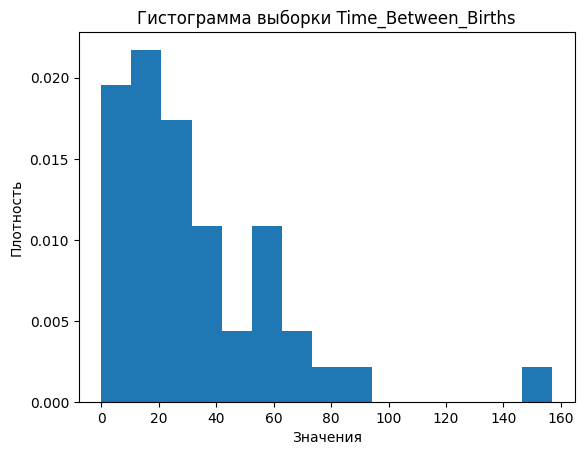

In [261]:
plt.hist(df['Time_Between_Births'], bins=num_bins, density=True)
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.title('Гистограмма выборки Time_Between_Births')
plt.show()

In [262]:
histogram_time, bin_edges_time = np.histogram(df['Time_Between_Births'], bins=num_bins)
observed_freq_time = histogram_time
observed_freq_time, bin_edges_time

(array([ 9, 10,  8,  5,  2,  5,  2,  1,  1,  0,  0,  0,  0,  0,  1],
       dtype=int64),
 array([  0.        ,  10.46666667,  20.93333333,  31.4       ,
         41.86666667,  52.33333333,  62.8       ,  73.26666667,
         83.73333333,  94.2       , 104.66666667, 115.13333333,
        125.6       , 136.06666667, 146.53333333, 157.        ]))

In [263]:
# Создаем новые интервалы
new_bin_edges = [0]  # Начинаем с первой границы
new_observed_freq = []  # Создаем новый список для наблюдаемых частот
current_bin_freq = 0  # Счетчик значений в текущем интервале

for i in range(1, len(bin_edges_time)):
    current_bin_freq += observed_freq_time[i - 1]
    if current_bin_freq >= 5:
        new_bin_edges.append(bin_edges_time[i])
        new_observed_freq.append(current_bin_freq)
        current_bin_freq = 0

# Последний интервал (если он остался) добавляем в последний интервал
if current_bin_freq > 0:
    new_observed_freq[-1] += current_bin_freq

# Преобразуем списки в массивы numpy
new_observed_freq = np.array(new_observed_freq)
new_bin_edges = np.array(new_bin_edges)
new_bin_edges[-1] = np.inf

observed_freq_time = new_observed_freq / df.shape[0]
bin_edges_time = new_bin_edges
observed_freq_time, bin_edges_time, sum(observed_freq_time)

(array([0.20454545, 0.22727273, 0.18181818, 0.11363636, 0.15909091,
        0.11363636]),
 array([ 0.        , 10.46666667, 20.93333333, 31.4       , 41.86666667,
        62.8       ,         inf]),
 1.0)

In [264]:
mean_time = df['Time_Between_Births'].mean()
std_dev_time = df['Time_Between_Births'].std()
dev_time = df['Time_Between_Births'].var()
print('Среднее: ', mean_time)
print('Стандартное отклонение: ', std_dev_time)
print('Дисперсия: ', dev_time)

Среднее:  32.5
Стандартное отклонение:  29.642442858250586
Дисперсия:  878.6744186046511


In [265]:
n = df.shape[0]
a_est_left_time = stats.chi2.ppf(q=gamma / 2, df=n*2) / (2*n*mean_time)
a_est_right_time = stats.chi2.ppf(q=1 - gamma / 2, df=n*2) / (2*n*mean_time)
print('Доверительный интервал для лямбды: (', a_est_left_time, '; ', a_est_right_time, ')')

Доверительный интервал для лямбды: ( 0.030247775567131492 ;  0.030826950675023505 )


In [266]:
expected_freq_time = []

for i in range(len(bin_edges_time) - 1):
    lower_bound = bin_edges_time[i]
    upper_bound = bin_edges_time[i + 1]
    expected_count = stats.expon.cdf(upper_bound, scale=mean_time) - stats.expon.cdf(lower_bound, scale=mean_time)
    expected_freq_time.append(expected_count)

expected_freq_time, sum(expected_freq_time)

([0.27533897272695057,
  0.19952742282461816,
  0.14458974719323192,
  0.10477855473419784,
  0.13095167522633588,
  0.14481362729466563],
 1.0)

In [267]:
chi_squared_statistic_time, chi_squared_p_value_time = stats.chisquare(f_obs=observed_freq_time, f_exp=expected_freq_time, ddof=1)
alpha = 0.05
if chi_squared_p_value_time < alpha:
    print("Выборка не имеет экспоненциальное распределение (p-value =", chi_squared_p_value_time, ")")
else:
    print("Выборка имеет экспоненциальное распределение (p-value =", chi_squared_p_value_time, ")")

Выборка имеет экспоненциальное распределение (p-value = 0.9997489514562691 )


In [268]:
ks_statistic_time, ks_p_value_time = stats.kstest(df['Time_Between_Births'], 'expon', args=(0, mean_time))
alpha = 0.05
if ks_p_value_time < alpha:
    print("Выборка не имеет экспоненциальное распределение (p-value =", ks_p_value_time, ")")
else:
    print("Выборка имеет экспоненциальное распределение (p-value =", ks_p_value_time, ")")

Выборка имеет экспоненциальное распределение (p-value = 0.45923712132737304 )


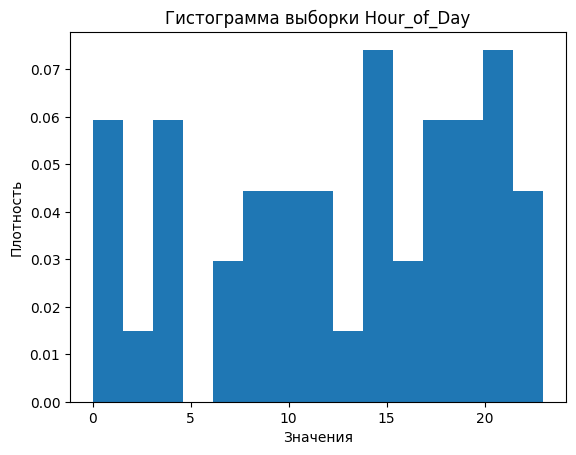

In [269]:
plt.hist(df['Hour_of_Day'], bins=num_bins, density=True)
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.title('Гистограмма выборки Hour_of_Day')
plt.show()

In [270]:
mean_hour = df['Hour_of_Day'].mean()
std_dev_hour = df['Hour_of_Day'].std()
dev_hour = df['Hour_of_Day'].var()
print('Среднее: ', mean_hour)
print('Стандартное отклонение: ', std_dev_hour)
print('Дисперсия: ', dev_hour)

Среднее:  12.681818181818182
Стандартное отклонение:  6.870133295727026
Дисперсия:  47.19873150105708


In [283]:
n = df.shape[0]
a_est_left_hour = mean_hour - stats.norm.ppf(1 - gamma / 2) * np.sqrt(mean_hour / n)
a_est_right_hour = mean_hour + stats.norm.ppf(1 - gamma / 2) * np.sqrt(mean_hour / n)
print('Доверительный интервал для альфа: (', a_est_left_hour, '; ', a_est_right_hour, ')')

Доверительный интервал для альфа: ( 12.648153159321902 ;  12.715483204314461 )


In [272]:
observed_freq_hour = np.array(df['Hour_of_Day'].value_counts(sort=False))
bin_edges_hour = df['Hour_of_Day'].unique()

In [273]:
observed_freq_hour, bin_edges_hour

(array([1, 3, 1, 4, 2, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 4, 3, 2, 1, 2],
       dtype=int64),
 array([ 0,  1,  2,  4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23], dtype=int64))

In [274]:
# Создаем новые интервалы
new_bin_edges = [0]  # Начинаем с первой границы
new_observed_freq = []  # Создаем новый список для наблюдаемых частот
current_bin_freq = 0  # Счетчик значений в текущем интервале

for i in range(1, len(bin_edges_hour)):
    current_bin_freq += observed_freq_hour[i - 1]
    if current_bin_freq >= 5:
        new_bin_edges.append(bin_edges_hour[i])
        new_observed_freq.append(current_bin_freq)
        current_bin_freq = 0

# Последний интервал (если он остался) добавляем в последний интервал
if current_bin_freq > 0:
    new_observed_freq[-1] += current_bin_freq

# Преобразуем списки в массивы numpy
new_observed_freq = np.array(new_observed_freq)
new_bin_edges = np.array(new_bin_edges).astype(float)
new_bin_edges[-1] = np.inf

observed_freq_hour = new_observed_freq / df.shape[0]
bin_edges_hour = new_bin_edges
observed_freq_hour, bin_edges_hour, sum(observed_freq_hour)

(array([0.11363636, 0.13636364, 0.13636364, 0.18181818, 0.15909091,
        0.22727273]),
 array([ 0.,  4.,  8., 11., 15., 19., inf]),
 0.9545454545454545)

In [275]:
expected_freq_hour = []

for i in range(len(bin_edges_hour) - 1):
    lower_bound = bin_edges_hour[i]
    upper_bound = bin_edges_hour[i + 1]
    expected_count = stats.expon.cdf(upper_bound, scale=mean_time) - stats.expon.cdf(lower_bound, scale=mean_time)
    expected_freq_time.append(expected_count)

expected_freq_time, sum(expected_freq_time)

([0.27533897272695057,
  0.19952742282461816,
  0.14458974719323192,
  0.10477855473419784,
  0.13095167522633588,
  0.14481362729466563,
  0.11580435510481699,
  0.10239370644357443,
  0.06893574165933611,
  0.08255301019555267,
  0.07299301208789538,
  0.5573201745088244],
 2.0)

In [276]:
chi_squared_statistic_time, chi_squared_p_value_time = stats.chisquare(f_obs=observed_freq_time, f_exp=expected_freq_time, ddof=1)
alpha = 0.05
if chi_squared_p_value_time < alpha:
    print("Выборка не имеет экспоненциальное распределение (p-value =", chi_squared_p_value_time, ")")
else:
    print("Выборка имеет экспоненциальное распределение (p-value =", chi_squared_p_value_time, ")")

ValueError: shapes (6,) and (12,) could not be broadcast together